In [1]:
#import all dependencies

%matplotlib inline
from IPython.display import Image
import import_ipynb
import plotly
from  plotly import plotly as py
import plotly.offline as offline
plotly.tools.set_credentials_file(username='arinmuk', api_key='UrLqynaS1XJWLX0mgx6V')
import pandas as pd
import gmaps
import plotly.graph_objs as go
import plotly.io as pio
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime
from datetime import date
from plotly import tools
offline.init_notebook_mode()
from pandas.tools.plotting import table
from utils.config import gkey
from cleanup_allfunctions import data_cleanup
from cleanup_allfunctions import buildmapbystatevio
from cleanup_allfunctions import gun_vio_locations
from cleanup_allfunctions import casualties_by_qtr_yr
from cleanup_allfunctions import gun_ownership_crime_report
from cleanup_allfunctions import build_victims_kil_stackedbar_state_year
from cleanup_allfunctions import build_victims_inj_stackedbar_state_year
from cleanup_allfunctions import casualty_plot
from cleanup_allfunctions import read_create_df_st_bars
from cleanup_allfunctions import setread_csvfile
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#plotly.io.orca.config.executable = '/C/Users/arin_/AppData/Roaming/npm/node_modules/orca'
print (__version__) # requires version >= 1.9.0

importing Jupyter notebook from cleanup_allfunctions.ipynb
3.5.0


In [6]:
#Data Cleanup
print("Starting Data Cleanup...........")
data_cleanup()
print("Completed Data Cleanup...........")

Starting Data Cleanup...........
Completed Data Cleanup...........


cleanup_allfunctions.ipynb:178: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.



Started plotting casualties by qtr / year


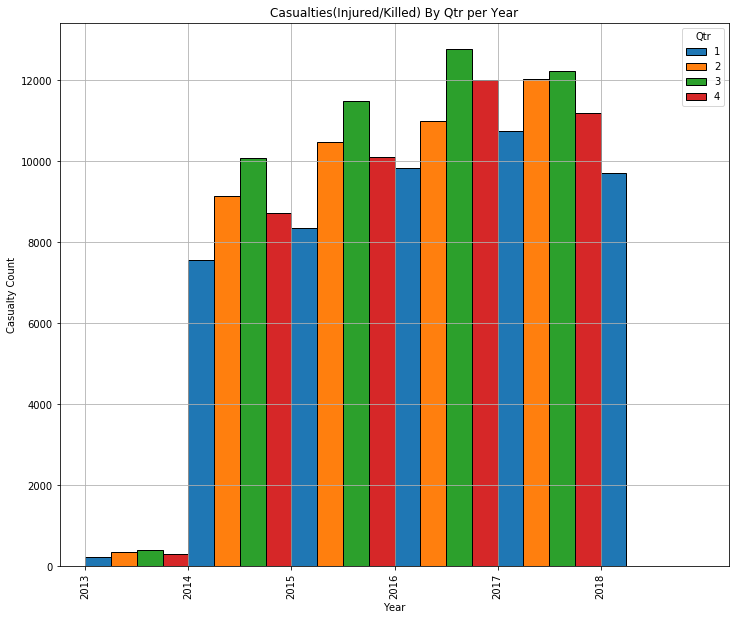

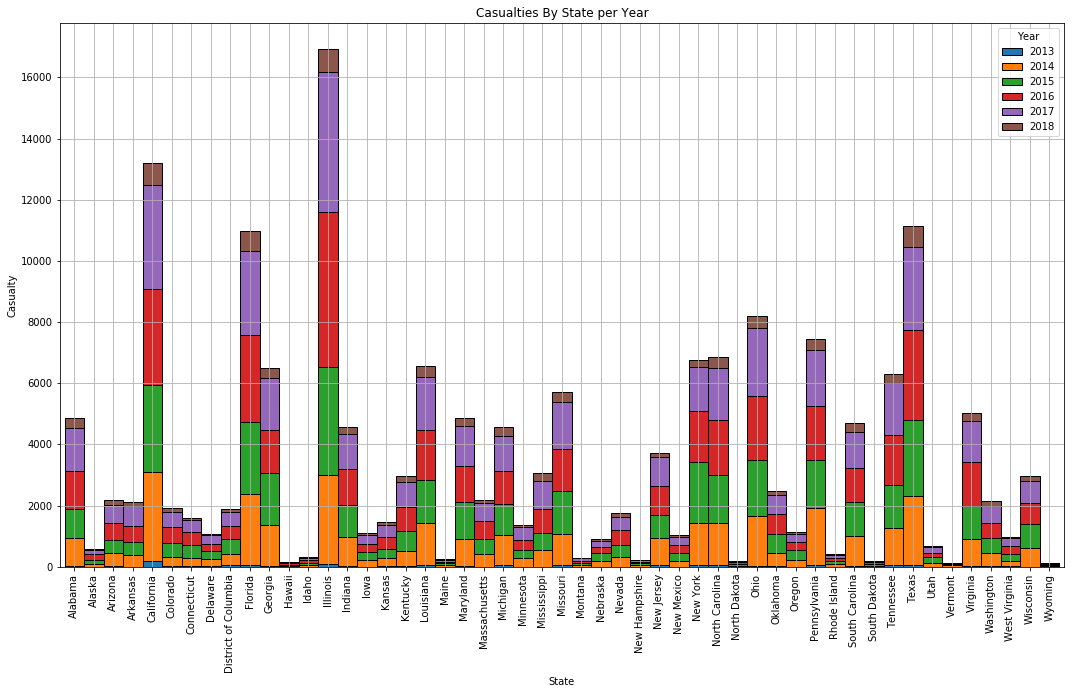

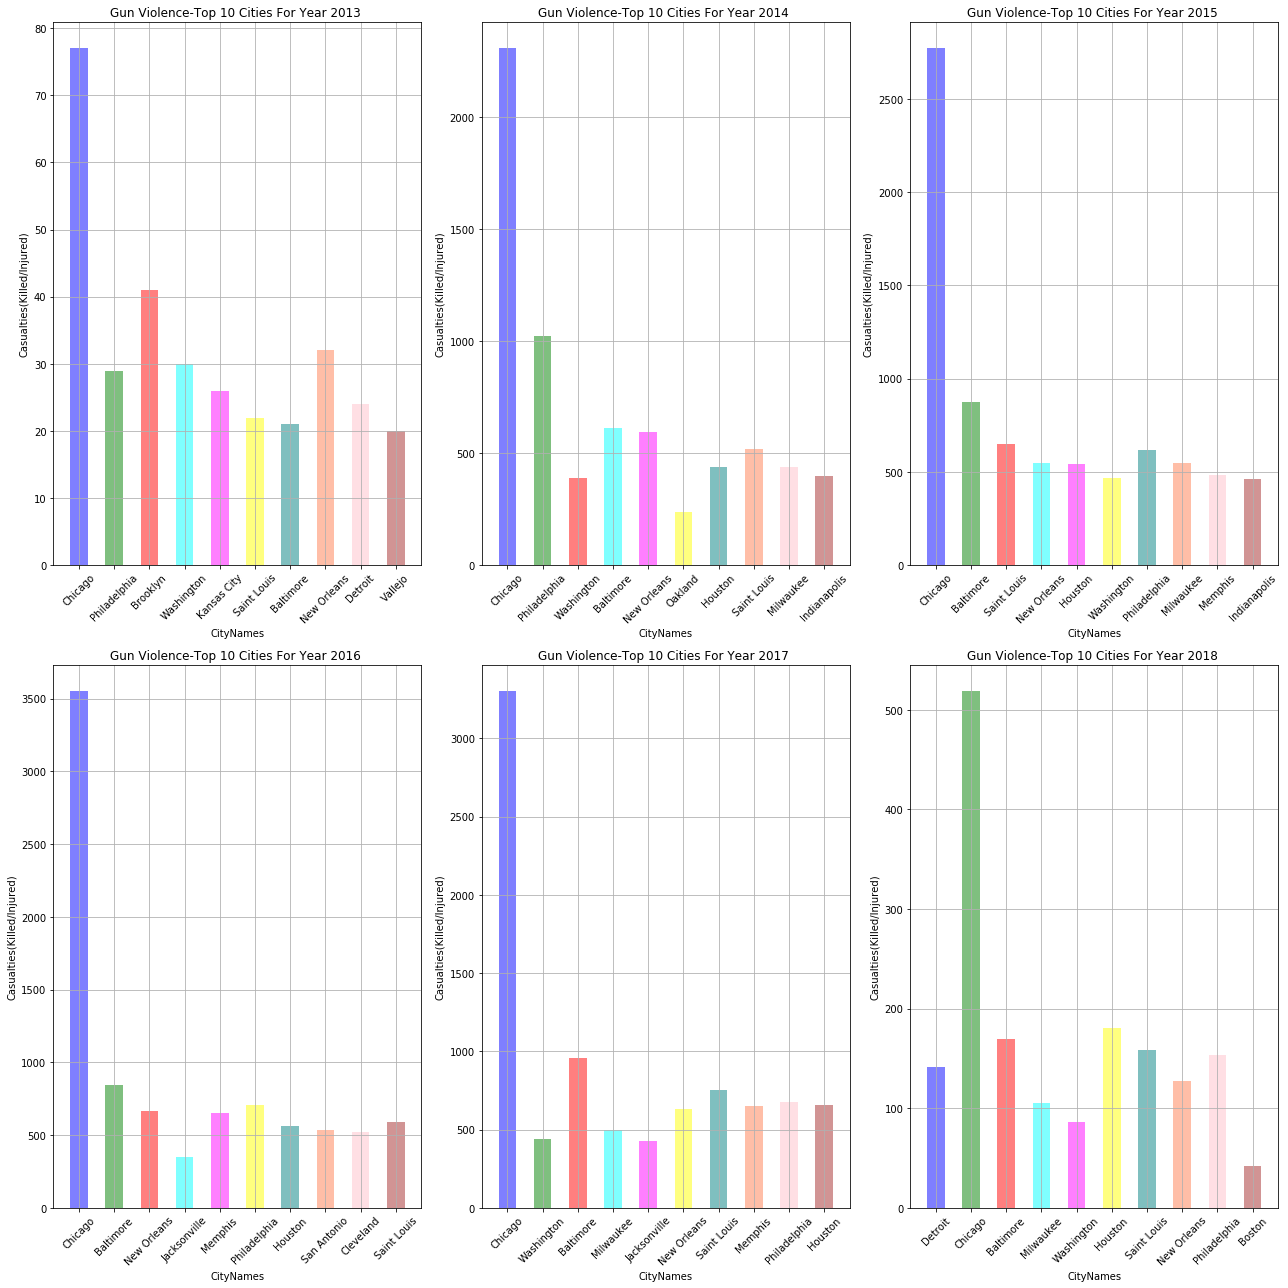

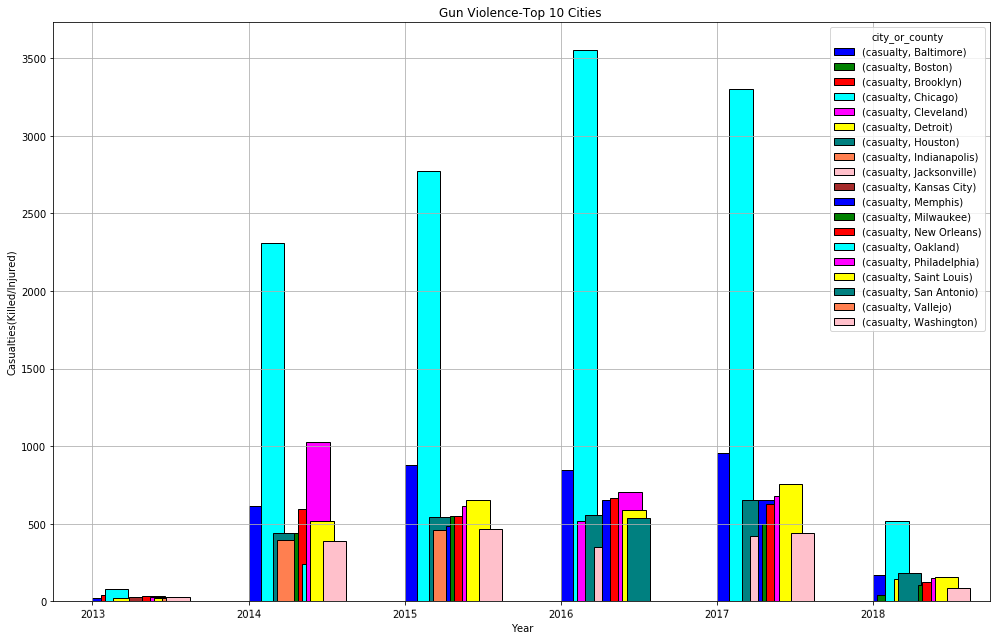

cleanup_allfunctions.ipynb:385: FutureWarning:

'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.



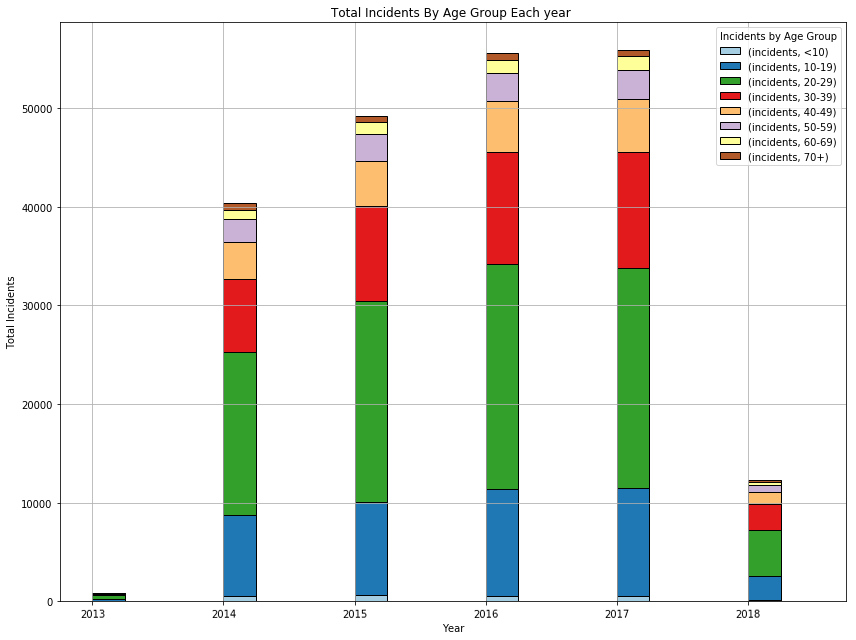

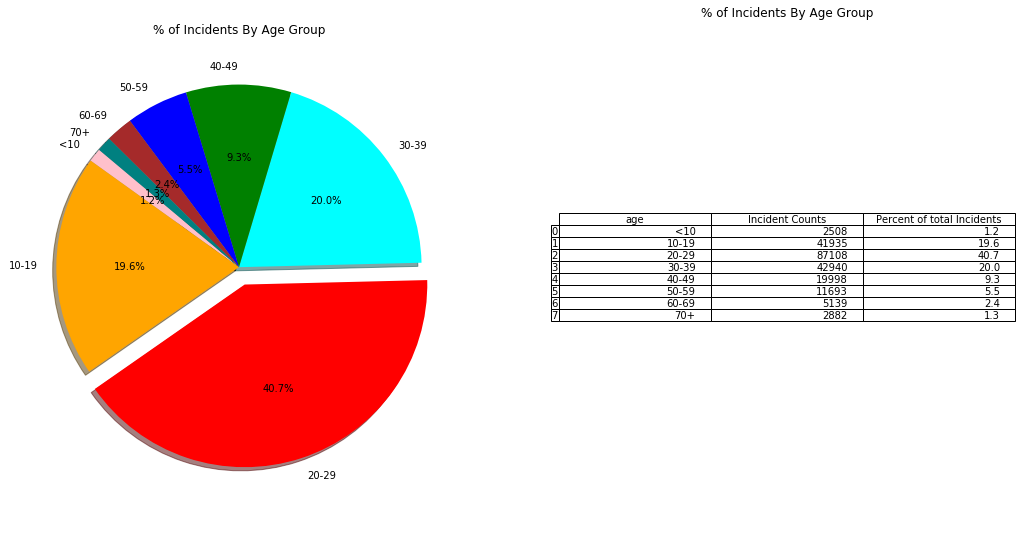

Completed plotting casualties by qtr / year


In [7]:
print("Started plotting casualties by qtr / year")
casualties_by_qtr_yr()
print("Completed plotting casualties by qtr / year")

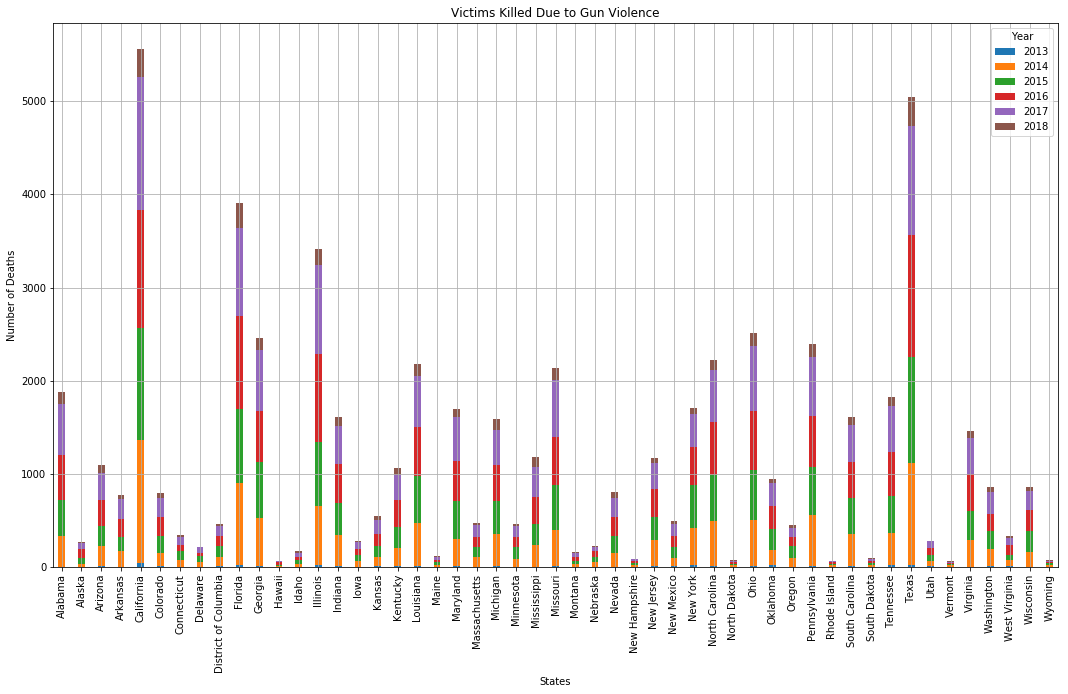

In [4]:
#Graph a stacked bar graph where the x-axis is each state and the stacked bars contain the victims killed for each year
casualties_by_year_df=read_create_df_st_bars(False)
ax=build_victims_kil_stackedbar_state_year(casualties_by_year_df)
ax.grid()

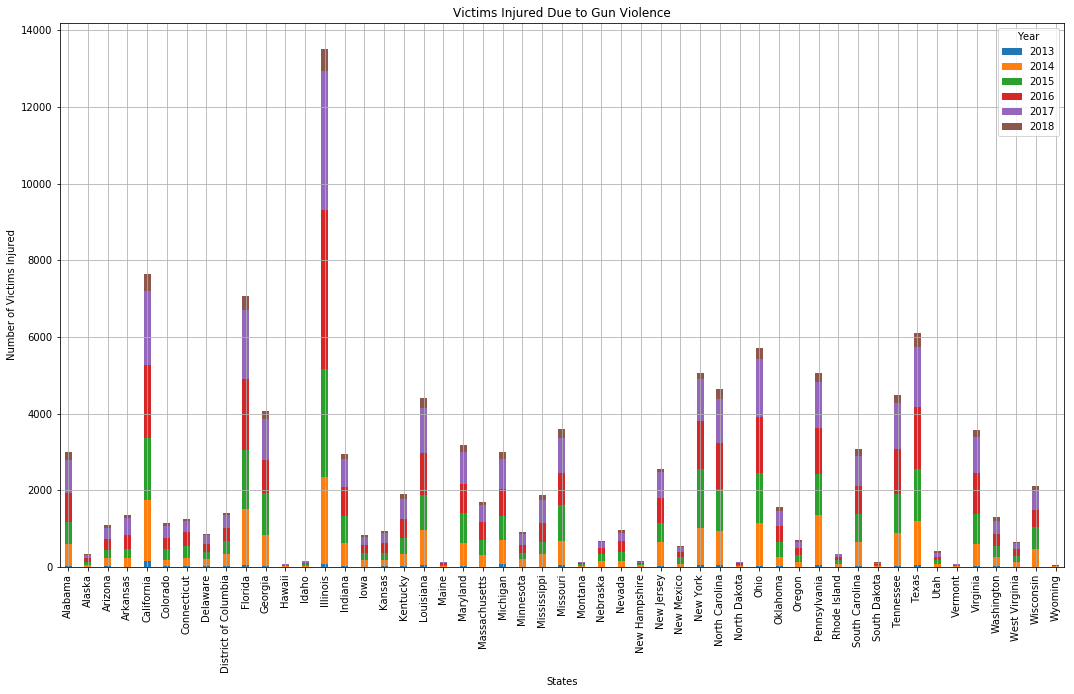

In [5]:
ax=build_victims_inj_stackedbar_state_year(casualties_by_year_df)
ax.grid()

Which state do you want to plot casualties for ? Please seperate states by a comma followed by a space.
 Entry format being:  New Jersey, New York, Ohio, California :
New Jersey, New York, Ohio, California
New Jersey
[2013, 2014, 2015, 2016, 2017, 2018]
[44, 906, 740, 951, 938, 129]
New York
[2013, 2014, 2015, 2016, 2017, 2018]
[71, 1362, 1984, 1691, 1439, 217]
Ohio
[2013, 2014, 2015, 2016, 2017, 2018]
[40, 1614, 1841, 2083, 2217, 416]
California
[2013, 2014, 2015, 2016, 2017, 2018]
[185, 2927, 2821, 3161, 3376, 736]


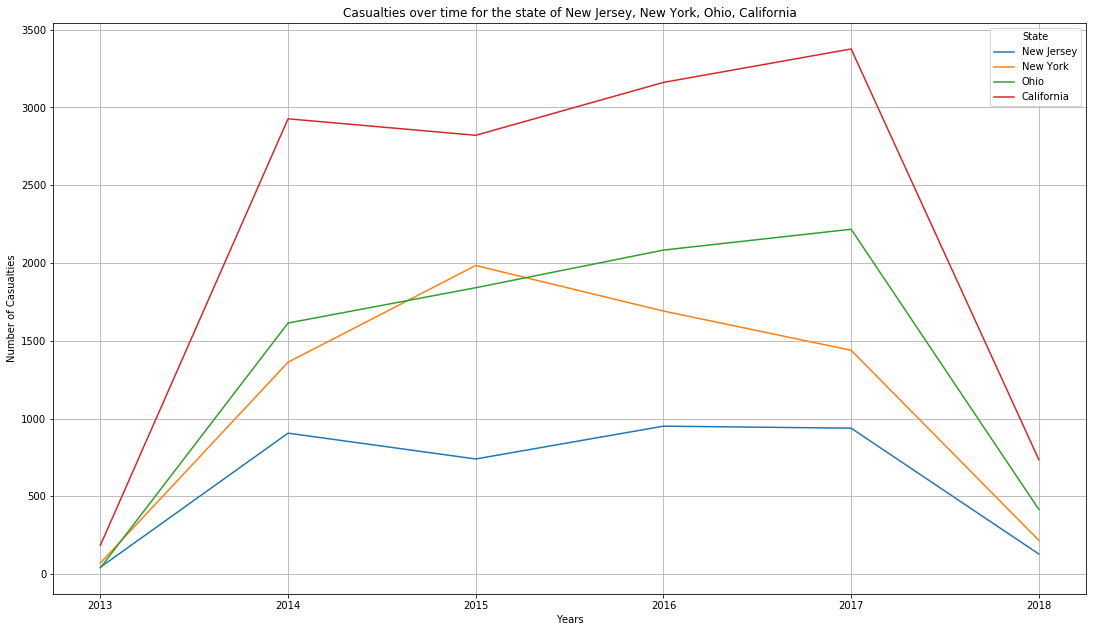

In [6]:
#This is an interactive graph , taking multiple state names as input and it shows a comparative graph
casualties_by_year_df=read_create_df_st_bars(True)

state  = input("Which state do you want to plot casualties for ? Please seperate states by a comma followed by a space.\n Entry format being:  New Jersey, New York, Ohio, California :\n")

type(state)
sList=state.split(', ')
#print(len(sList))
ax=casualty_plot(sList,casualties_by_year_df)
ax.grid()

In [2]:
#Get year you want to see 
yr = input("Gun Violations State - Please enter the year ")
usa_gunviobyyr_df=setread_csvfile(yr,True)
#usa_gunviobyyr_df.head(45)

Gun Violations State - Please enter the year 2017


In [3]:
#build USA map with  state where casualities happened
mapfig=buildmapbystatevio(usa_gunviobyyr_df,yr)
#py.iplot( mapfig, filename='d3-cloropleth-map' )
offline.iplot( mapfig, filename='d3-cloropleth-map',image='png' )
###this is an interactive image. it can be seen as a screenshot which has been attached. 
#But the view or workings can ve seen when the jupyternotebook is run

In [9]:
#build google map with lat and lng where casualities happened
#This is also an interactive map. this map has been attached to our presentation via screen capture. it can viewed realtime based
# on year value interactively when the notebook is run with Google API key
usa_gunviobyyr_df=setread_csvfile(yr,False)

geomaps=gun_vio_locations(usa_gunviobyyr_df,gkey)
fig = gmaps.figure()
fig.add_layer(geomaps)
print("gmaps build completed...............")
fig

gmaps build completed...............


Figure(layout=FigureLayout(height='420px'))

Started Building Gun owndership report


cleanup_allfunctions.ipynb:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

cleanup_allfunctions.ipynb:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

cleanup_allfunctions.ipynb:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

cleanup_allfunctions.ipynb:42: SettingWithCopyWarning:


A value is trying to be set on 

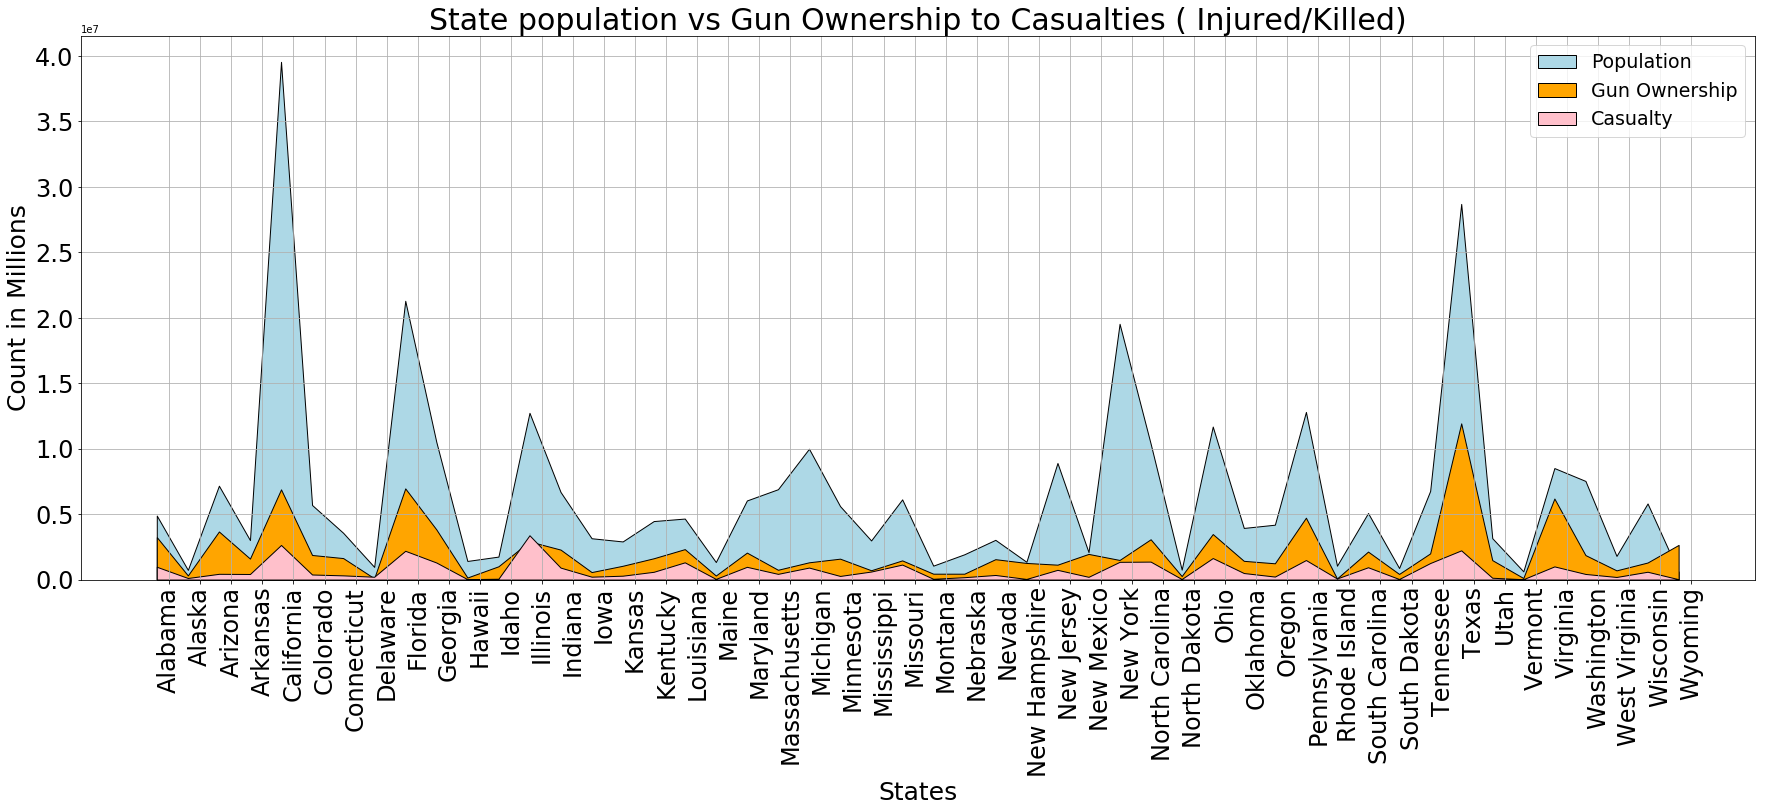

Completed Building Gun owndership report


In [10]:
#calling gun ownership report 
print("Started Building Gun owndership report")
gun_ownership_crime_report()
print("Completed Building Gun owndership report")